# Exercise 1 - Preprocessing

In [13]:
import pandas as pd
df = pd.read_csv("pca2.csv")
df.head()

,X1,X2
0,-0.460516,-0.599575
1,1.004258,1.213128
2,2.224446,-0.584735
3,0.242724,-0.499436
4,1.797815,2.457839


In [30]:
df = df - df.mean()
df.head()

,X1,X2
0,-1.411663,-1.612040
1,0.053112,0.200662
2,1.273300,-1.597200
3,-0.708422,-1.511901
4,0.846668,1.445373


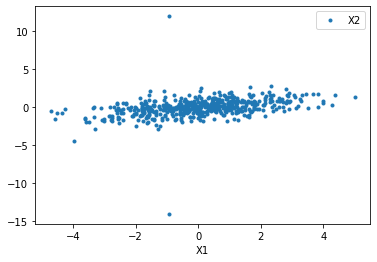

In [31]:
df.plot(x="X1", y="X2", style=".")

In [32]:
X = df.T.to_numpy()
X.shape

(2, 500)

## a)

In [42]:
df.cov()

,X1,X2
X1,2.744931,0.798481
X2,0.798481,1.619192


In [41]:
import numpy as np
C = np.cov(X)
C

array([[2.74493052, 0.79848114],
       [0.79848114, 1.61919205]])

In [34]:
from numpy.linalg import eig
e, M = eig(C)
print("Eigenvalues:", e)
print("Eigenvectors:", M)

Eigenvalues: [3.15899214 1.20513042]
Eigenvectors: [[ 0.88773892 -0.46034728]
 [ 0.46034728  0.88773892]]


In [35]:
sort_perm = e.argsort()[::-1]
e = e[sort_perm]
M = M[:,sort_perm]
print("Eigenvalues:", e)
print("Eigenvectors:", M)

Eigenvalues: [3.15899214 1.20513042]
Eigenvectors: [[ 0.88773892 -0.46034728]
 [ 0.46034728  0.88773892]]


In [36]:
U = M.T @ X
U.shape

(2, 500)

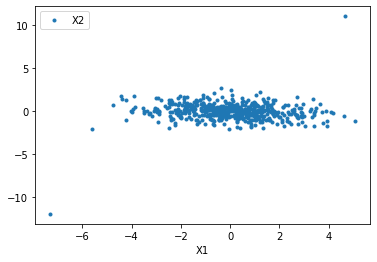

In [72]:
pd.DataFrame(U.T, index=df.index, columns=df.columns).plot(x="X1", y="X2", style=".")

## b)

In [63]:
print("Outlier 1:", X[:,16])
print("Outlier 2:", X[:,156])
print("X1 min max:", X[0].min(), X[0].max())
print("X2 min max:", X[1].min(), X[1].max())

Outlier 1: [-0.95114605 11.98753431]
Outlier 2: [ -0.95114605 -14.01246569]
X1 min max: -4.727450289116961 5.013463904510789
X2 min max: -14.012465690137141 11.987534309862859


In [65]:
X_prime = np.delete(X, [16, 156], axis=1)
print("X1 min max:", X_prime[0].min(), X_prime[0].max())
print("X2 min max:", X_prime[1].min(), X_prime[1].max())

X1 min max: -4.727450289116961 5.013463904510789
X2 min max: -4.44837382650894 2.7914312518844397


In [66]:
X_prime.shape

(2, 498)

In [68]:
C_prime = np.cov(X_prime)
C_prime

array([[2.75232133, 0.79780352],
       [0.79780352, 0.94148576]])

In [69]:
e_prime, M_prime = eig(C_prime)
sort_perm = e_prime.argsort()[::-1]
e_prime = e_prime[sort_perm]
M_prime = M_prime[:,sort_perm]
print("Eigenvalues:", e_prime)
print("Eigenvectors:", M_prime)

Eigenvalues: [3.05366443 0.64014267]
Eigenvectors: [[ 0.93549122 -0.35334993]
 [ 0.35334993  0.93549122]]


In [74]:
U_prime = M_prime.T @ X_prime

### Principal Components of centered data

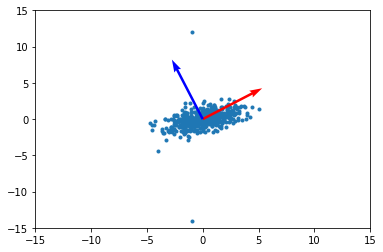

In [117]:
fig, ax = plt.subplots()
ax.plot(X[0], X[1], ".")
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

ax.quiver([0, 0], [0,0], M[0], M[1], scale=5, color=["r", "b"], zorder=10)

### Principal Components of centered data without outliers

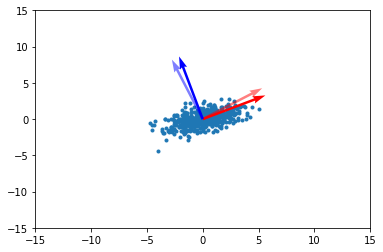

In [119]:
fig, ax = plt.subplots()
ax.plot(X_prime[0], X_prime[1], ".")
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

ax.quiver([0, 0], [0,0], M[0], M[1], scale=5, color=["r", "b"], zorder=10, alpha=0.5)
ax.quiver([0, 0], [0,0], M_prime[0], M_prime[1], scale=5, color=["r", "b"], zorder=11)

### Comparison of projections

Data is upside down compared to solution

(-15, 15)

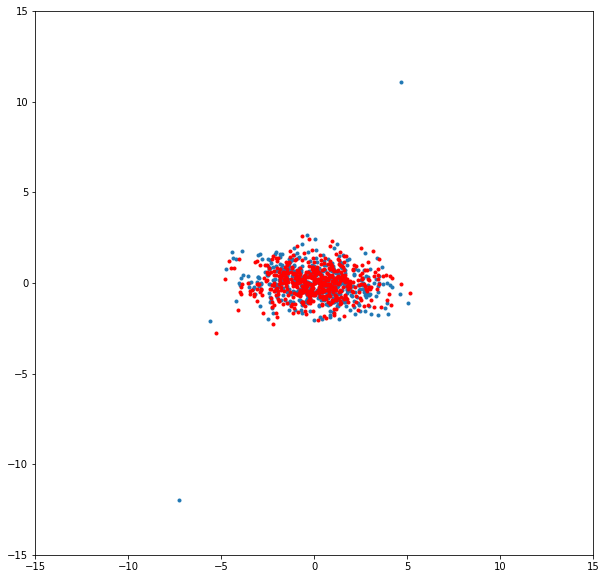

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(U[0], U[1], ".")
ax.plot(U_prime[0], U_prime[1], "r.")
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])